<a href="https://colab.research.google.com/github/prajaktasonawane98/My-Projects/blob/main/Task2_UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name : Prajakta Sonawane**

# **Task 2 - Perform Clustering technique on Iris Dataset**

**Data Science and Business Analytics Intern at The Sparks Foundation**

**Problem Statement** - Predict the optimum number of clusters for Iris dataset.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

**Loading Dataset**

In [2]:
iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Drop unwanted column**

In [3]:
iris_data = iris.drop(['Id'], axis=1)
iris_data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris_data.shape

(150, 5)

Now, This dataset has 150 rows and 5 columns

**stores the Attributes/Predictors in variable x**

In [5]:
x = iris_data.iloc[:, [0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**Gets the information about dataset**

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Crosstab about Frequency distribution of species**

In [7]:
iris_outcome = pd.crosstab(index=iris_data["Species"],  columns="count")      
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# **Exploratory Data Analysis**

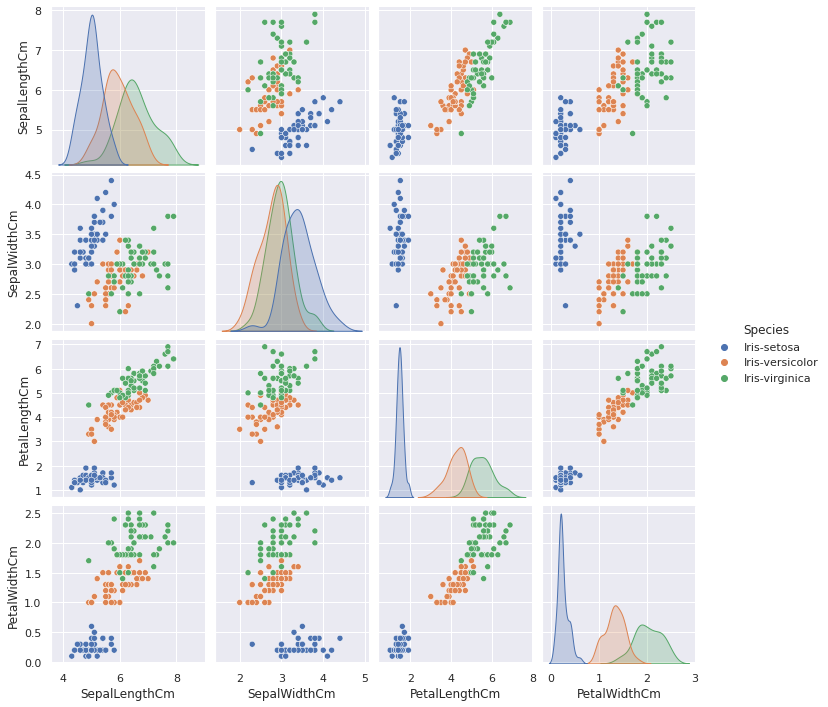

In [8]:
sns.set()
sns.pairplot(iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], hue="Species", 
             diag_kind="kde")

In [9]:
iris_setosa=iris_data.loc[iris_data["Species"]=="Iris-setosa"]
iris_virginica=iris_data.loc[iris_data["Species"]=="Iris-virginica"]
iris_versicolor=iris_data.loc[iris_data["Species"]=="Iris-versicolor"]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated

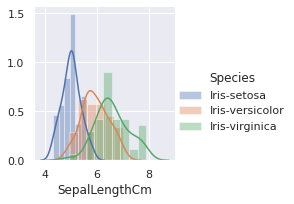

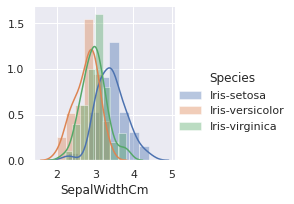

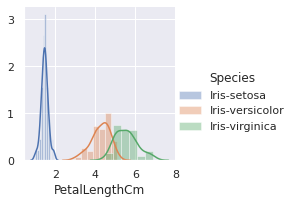

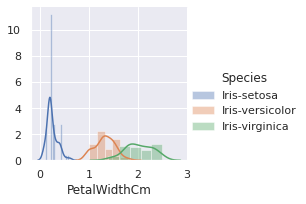

In [10]:
sns.FacetGrid(iris_data,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
sns.FacetGrid(iris_data,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
sns.FacetGrid(iris_data,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris_data,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()

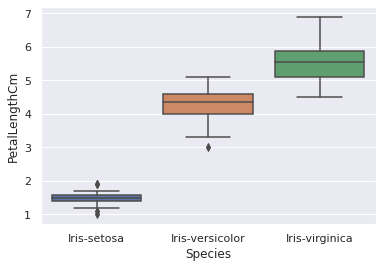

In [11]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

# **Data Modeling**

In [12]:
from sklearn.cluster import KMeans

**Finding the optimum number of clusters for k-means classification**

In [13]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

**Plotting the Elbow Curve which represents the cluster**

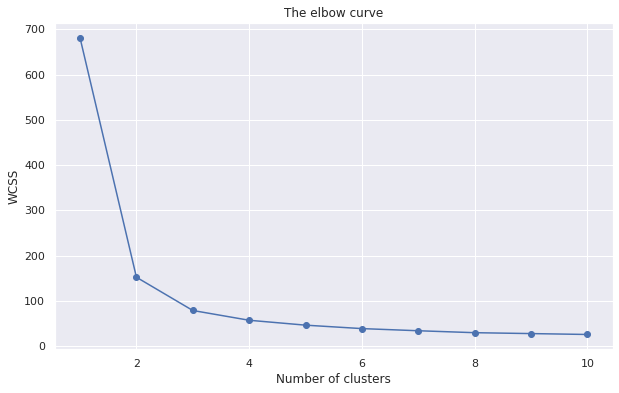

In [14]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

The representation shows the elbow at the point 3, means we can choose k=3 clusters for the analysis.

**Training and Prediction**

In [15]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ykmeans = km.fit_predict(x)
ykmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [16]:
km.cluster_centers_[:, 0]

array([6.85     , 5.006    , 5.9016129])

In [17]:
km.cluster_centers_[:,1]

array([3.07368421, 3.418     , 2.7483871 ])

## **Final Output**

**Visualising the clusters with centroids**

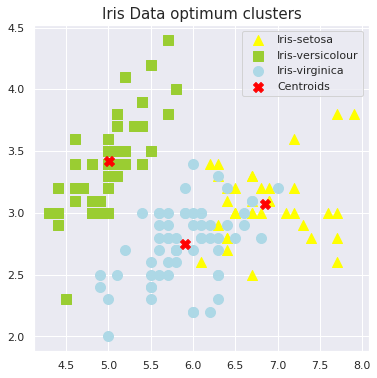

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(x[ykmeans == 0, 0], x[ykmeans == 0, 1], s=100, c='yellow', marker='^', label='Iris-setosa')
plt.scatter(x[ykmeans == 1, 0], x[ykmeans == 1, 1], s=100, c='yellowgreen', marker='s', label='Iris-versicolour')
plt.scatter(x[ykmeans == 2, 0], x[ykmeans == 2, 1], s=100, c='lightblue', marker="o", label='Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids',
            marker='X')
plt.title("Iris Data optimum clusters", fontsize=15)
plt.legend()

## **Thank You**